<a href="https://colab.research.google.com/github/MiltonGallardo/MiltonGallardo/blob/main/Ejercicio_Comparaci%C3%B3n_Jerarquico_DBScan_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea: Mejor modelo de agrupamiento

> Bloc con sangría



In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [77]:
df = pd.read_csv('/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/cust_seg.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


In [78]:
df.loc[:,['Income', 'Card Debt']]
df1=df.loc[:,['Income', 'Card Debt']]
df1

,Income,Card Debt
Customer Id,,
1,19,0.124
2,100,4.582
3,57,6.111
4,19,0.681
5,253,9.308
...,...,...
846,26,0.548
847,34,0.359
848,18,2.802


In [79]:
# Instanciar escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df1 = scaler.fit_transform(df1)

# Agrupamiento Jerarquico

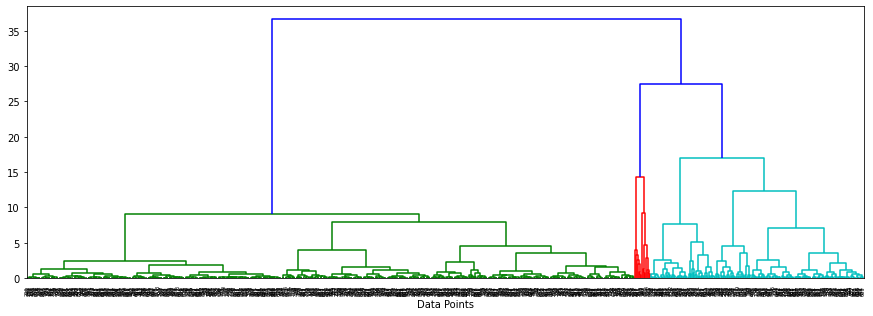

In [89]:
# Visualizar dendrograma
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df1, method = 'ward'))
plt.xlabel('Data Points');

# Agrupamiento en Python

In [96]:
# Instanciar agrupamiento
hc = AgglomerativeClustering(n_clusters = 4)
hc.fit(scaled_df1)

AgglomerativeClustering(n_clusters=4)

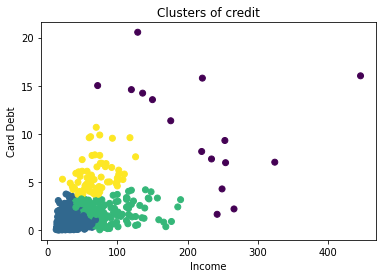

In [97]:
# Guardar las etiquetas del clúster en el marco de datos
df1['cluster'] = hc.labels_
# Visualizar los clusters
plt.scatter(df1['Income'], df1['Card Debt'], c = df1['cluster'])
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.title('Clusters of credit');


# DBScan

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
# Instanciar Escalador Estándar copy
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(df1)

In [53]:
# Crear una instancia y ajustar la agrupación en clústeres: esto se hace en un solo paso para DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df1)

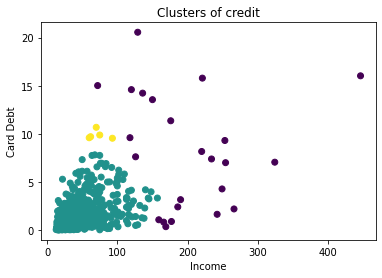

In [55]:
# Guardar las etiquetas del clúster en el marco de datos
df1['cluster'] = dbs.labels_
# Visualizar los clústers
plt.scatter(df1['Income'], df1['Card Debt'], c = df1['cluster'])
plt.xlabel('Income')
plt.ylabel('Card Debt')
plt.title('Clusters of credit');

In [57]:
# Instanciar Escalador Estándar  
scaler = StandardScaler()
# Ajustar y transformar los datos
scaled_df1 = scaler.fit_transform(df1)

# Mejor modelo de agrupamiento es: KMeans con el 0.78 con el numero de cluster de 3

In [58]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# valor de silueta KMeans 
Según el gráfico, ¿cuál es el mejor número de conglomerados para estos datos? (¡Recuerda que las puntuaciones de silueta más altas son mejores!)

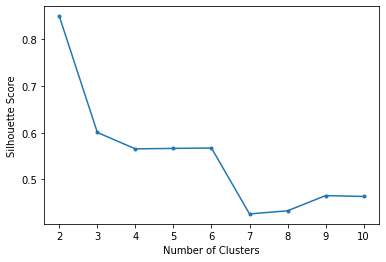

In [73]:

# Visualiza diferentes puntuaciones de silueta
# Guardar las puntuaciones de silueta para varios números de clúster en la lista
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df1)
  silhouette_scores.append(silhouette_score(scaled_df1, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [81]:
# Ajustar el modelo kmeans con 2 grupos y mostrar la puntuación de silueta
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df1, kmeans.labels_)

0.7842512682271762

# Valor de silueta agrupación jerarquica

In [82]:
# Consultar la puntuación de silueta de agrupación jerárquica
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df1)
silhouette_score(scaled_df1, hc.labels_)

0.5435863708875828

# valor de silueta SCAN

In [83]:
# Ver puntuación de silueta DBSCAN
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df1)
silhouette_score(scaled_df1, dbs.labels_)

0.6965886820590997